## Model Training

### 1.1 Import Data and Required Packages

Import Pandas, Numpy, Matplotlib, Seaborn and Warnings Libraries

In [1]:
#Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import warnings

Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv("C:/Users/uyen/Desktop/mlproject/notebook/data/stud.csv")

Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 1.2 Preparing for Modelling

Preparing X and Y variables

In [4]:
X = df.drop(columns = ['math_score'], axis = 1)

In [5]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
print("Categories in 'gender' variable:", end = " ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:", end = " ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable:", end = " ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:", end = " ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable:", end = " ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable: ['female' 'male']
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable: ['none' 'completed']


In [7]:
y = df['math_score']

In [8]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

Transform Columns

In [9]:
#create column transformer with 3 types of transformers
num_features = X.select_dtypes(exclude = "object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [10]:
X = preprocessor.fit_transform(X)

In [11]:
X.shape

(1000, 19)

Separate Train and Test data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

### 1.3 Evaluation Function

Create an Evaluation Function to Return Metrics After Modelling

In [13]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_squared = r2_score(true, predicted)
    return mae, rmse, r2_squared

Define Models

In [14]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose = False),
    "AdaBoost Regressor": AdaBoostRegressor()
}


In [15]:
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    #Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for Training Set")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Squared Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print("---------------------------------------")

    print("Model Performance for Test Set")
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("=" * 35)
    print("\n")


Linear Regression
Model Performance for Training Set
- Root Mean Squared Error: 5.3231
- Mean Absolute Squared Error: 4.2667
- R2 Score: 0.8743
---------------------------------------
Model Performance for Test Set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model Performance for Training Set
- Root Mean Squared Error: 6.5938
- Mean Absolute Squared Error: 5.2063
- R2 Score: 0.8071
---------------------------------------
Model Performance for Test Set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model Performance for Training Set
- Root Mean Squared Error: 5.3233
- Mean Absolute Squared Error: 4.2650
- R2 Score: 0.8743
---------------------------------------
Model Performance for Test Set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model Performance for Training Set
- Root Mean Squared Error: 5.7088
- Mean Absolute Squared Error: 4.

c:\Users\uyen\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\uyen\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\uyen\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\uyen\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\uyen\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(

Random Forest Regressor
Model Performance for Training Set
- Root Mean Squared Error: 2.3157
- Mean Absolute Squared Error: 1.8373
- R2 Score: 0.9762
---------------------------------------
Model Performance for Test Set
- Root Mean Squared Error: 5.9468
- Mean Absolute Error: 4.6176
- R2 Score: 0.8547


XGBRegressor
Model Performance for Training Set
- Root Mean Squared Error: 1.0073
- Mean Absolute Squared Error: 0.6875
- R2 Score: 0.9955
---------------------------------------
Model Performance for Test Set
- Root Mean Squared Error: 6.4733
- Mean Absolute Error: 5.0577
- R2 Score: 0.8278


CatBoosting Regressor
Model Performance for Training Set
- Root Mean Squared Error: 3.0427
- Mean Absolute Squared Error: 2.4054
- R2 Score: 0.9589
---------------------------------------
Model Performance for Test Set
- Root Mean Squared Error: 6.0086
- Mean Absolute Error: 4.6125
- R2 Score: 0.8516


AdaBoost Regressor
Model Performance for Training Set
- Root Mean Squared Error: 5.8068
- Mean 

### 1.4 Results

In [16]:
pd.DataFrame(list(zip(model_list, r2_list)), columns = ['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending = False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.854669
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.848231
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.784030
4,Decision Tree,0.759101


### 1.5 Linear Regression

In [17]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is {:.2f}".format(score))

Accuracy of the model is 88.04


Plot y_pred and y_test

Text(0.5, 1.0, 'Scatter Plot of Predicted vs Actual Values')

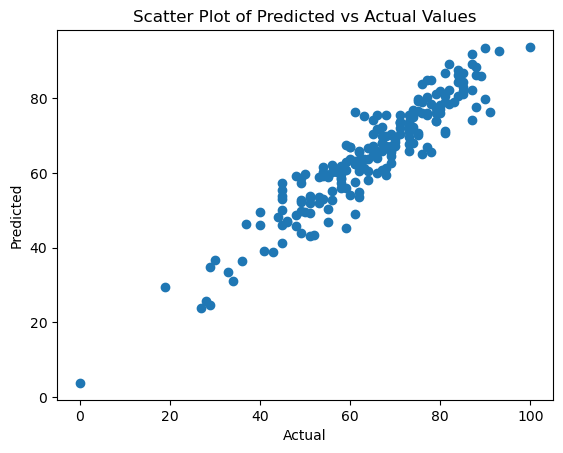

In [18]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Scatter Plot of Predicted vs Actual Values")

Text(0.5, 1.0, 'Scatter Plot of Predicted vs Actual Values')

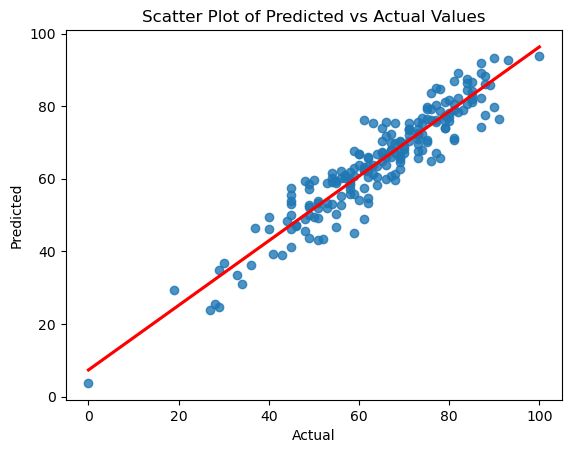

In [19]:
sns.regplot(x = y_test, y = y_pred, ci = None, line_kws = dict(color = 'r'))
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Scatter Plot of Predicted vs Actual Values")

Difference Between Actual and Predicted Values

In [20]:
pred_df = pd.DataFrame({'Actual Value': y_test, "Predicted Value": y_pred, "Difference": y_test - y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
